In [0]:
# rnn은 시계열 / 텍스트 분석에 쓰임
# 시간에 따른 데이터를 가지고 기온예측/베이징 공기질 예측/전기예측

기존데이터 맞으면 인풋쉐이프 들어가면 쌓였음
cov2d
pooling
mlp 이런건 해봄

신경망에만 넣어서 결과빼는건 시계열과맞지않음



In [0]:
from keras.layers import SimpleRNN


Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [0]:
# 모델 쌓기
model = Sequential()
model.add(Embedding(10000, 32)) # 텍스트데이터에선 임베딩으로 벡터화하고 rnn에 넣음/ 이미 벡터상태라면ㄱㅊ
model.add(SimpleRNN(32, return_sequences=True)) # rnn층엔 다른 입력 하나도 알려줘야함 true면 상태 시퀀스 반환하여 다음에 넘기겠다 / rnn은 겹겹이 샇을때 출력이 좋음
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #맨 위 마지막층은 출력만 반화// 층하나가 쭉늘어지는거임
model.summary()

W0725 03:30:26.202312 139651334322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 03:30:26.254936 139651334322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 03:30:26.264544 139651334322048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 326,240
Trainable params: 326,240
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence #시퀀스 입력받는게 시계열형ㅌ태로
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [0]:
len(input_test)

25000

In [0]:
input_train = sequence.pad_sequences(input_train, maxlen = 500) # 넣을수 있겎므 만듬 / 한줄로 쭉이어지게 만듬/  원핫인코딩은 엄청 긴 시퀀스(예 10000개의 시퀀스중 희소행렬)//임베딩은 다 의미가 있는 시퀀스로 단어의 순서대로 놓는것
input_test = sequence.pad_sequences(input_test, maxlen = 500) # naxlen 문장의 길이

In [0]:
input_train[0] # 10000개 단어 .벡터화아직안됨// 임베딩층에서 벡터라이징 해서 넘겨줌

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [0]:
from keras.layers import Dense


model = Sequential()
model.add(Embedding(10000, 32)) # 텍스트는 ㅁ주건 첨에 인베딩
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid')) # 

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.6740 - acc: 0.5874 - val_loss: 0.6090 - val_acc: 0.7028
Epoch 2/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.4857 - acc: 0.7842 - val_loss: 0.5063 - val_acc: 0.7432
Epoch 3/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3368 - acc: 0.8623 - val_loss: 0.5265 - val_acc: 0.7368
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.1992 - acc: 0.9338 - val_loss: 0.6080 - val_acc: 0.7278
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.0952 - acc: 0.9759 - val_loss: 0.7351 - val_acc: 0.7180
Epoch 6/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.0387 - acc: 0.9927 - val_loss: 0.8639 - val_acc: 0.7112
Epoch 7/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.0149 - acc: 0.9990 - val_loss: 0.9523 - val_acc:

In [0]:
a = history.history
a['acc']

[0.5874,
 0.7842,
 0.86225,
 0.9338,
 0.9759,
 0.99265,
 0.99895,
 0.9997,
 0.99985,
 0.9999]

In [0]:
results = model.evaluate(input_test, y_test)

25000/25000 [==============================] - 32s 1ms/step


In [0]:
results

[1.1302839125061035, 0.7084]

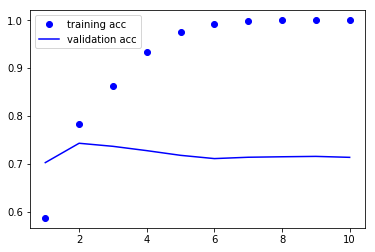

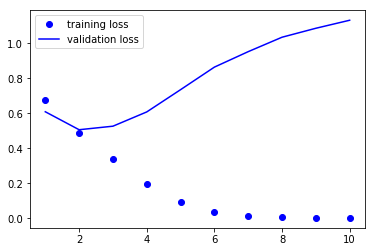

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.legend()

plt.show() # 500단어밖에 안봄, 처음말했던 나는 이라는값에대한 기억이 돌아가면돌아갈수록 소실됨 -> lstm

In [0]:
# LSTM dropout필수
from keras.layers import LSTM
model2 = Sequential()
model2.add(Embedding(10000, 32)) # 텍스트는 ㅁ주건 첨에 인베딩
model2.add(LSTM(32))
model2.add(Dense(1, activation = 'sigmoid')) # 

model2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

history = model2.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 147s 7ms/step - loss: 0.5973 - acc: 0.6844 - val_loss: 0.5132 - val_acc: 0.7400
Epoch 2/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.4284 - acc: 0.8024 - val_loss: 0.4991 - val_acc: 0.7480
Epoch 3/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.3636 - acc: 0.8434 - val_loss: 0.5241 - val_acc: 0.7496
Epoch 4/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.3257 - acc: 0.8660 - val_loss: 0.5610 - val_acc: 0.7454
Epoch 5/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.2948 - acc: 0.8822 - val_loss: 0.5958 - val_acc: 0.7418
Epoch 6/10
20000/20000 [==============================] - 145s 7ms/step - loss: 0.2686 - acc: 0.8958 - val_loss: 0.6371 - val_acc: 0.7356
Epoch 7/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.2414 - acc: 0.9090 - val_loss: 0.6687 - v